# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs.

In [ ]:
!pip install langchain langchain_openai langchain_community

In [1]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [3]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')


## Dall-E

In [2]:
import openai
from langchain.tools import tool
from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI
import sys

In [7]:
# Detect if the environment is Colab
try:
    import google.colab  # If in Colab
    is_colab = True
except ImportError:
    is_colab = False

# Set your OpenAI API key
openai.api_key = "YOUR_KEY"

In [4]:
# Global variable to capture image URL
latest_image_url = None

@tool
def generate_image(prompt: str) -> str:
    """Generate an image using DALL·E based on the given prompt."""
    global latest_image_url
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        n=1,
        size="1024x1024"
    )
    image_url = response.data[0].url
    latest_image_url = image_url
    return image_url


In [5]:
# Initialize the agent
tools = [generate_image]
llm = ChatOpenAI(temperature=0)

mrkl = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run the agent
result = mrkl.invoke("How would you visualize a parrot playing soccer?")


C:\Users\azams\AppData\Local\Temp\ipykernel_25112\203905232.py:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0)
C:\Users\azams\AppData\Local\Temp\ipykernel_25112\203905232.py:5: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.lang



> Entering new AgentExecutor chain...
I can use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "parrot playing soccer"
Observation: https://oaidalleapiprodscus.blob.core.windows.net/private/org-204wqXi3p14EG8vuh7hGNw97/user-T1Nfr7jA7BkFY3QUDwaCMH8e/img-4RhNx0njbwk7MT04tE9o9ewB.png?st=2025-05-07T15%3A46%3A34Z&se=2025-05-07T17%3A46%3A34Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=475fd488-6c59-44a5-9aa9-31c4db451bea&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-05-07T00%3A57%3A33Z&ske=2025-05-08T00%3A57%3A33Z&sks=b&skv=2024-08-04&sig=WBIMghZNyfN1V/nFaG5tavEa9GNlFeliV/5uxBlwsTM%3D
Thought:I have successfully generated an image of a parrot playing soccer.
Final Answer: The image of a parrot playing soccer can be visualized using the generate_image tool.

> Finished chain.


In [ ]:
# Display the image based on the environment
if is_colab:
    # Colab: Use IPython to display image inline
    from IPython.display import Image, display
    display(Image(url=latest_image_url))
else:
    # Local: Use PIL or other method to show the image
    from PIL import Image as PILImage
    import requests
    from io import BytesIO

    # Download and display image
    response = requests.get(latest_image_url)
    img = PILImage.open(BytesIO(response.content))
    img.show()  # This will open the image using the default image viewer


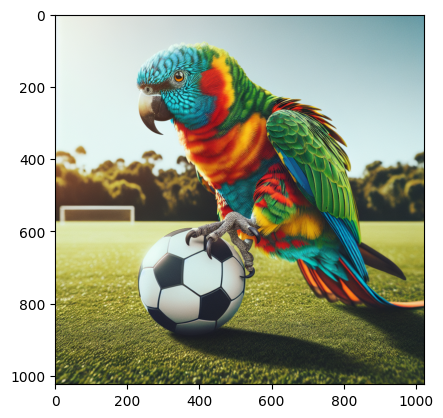

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img)

## StableDiffusion

In [16]:
pip install diffusers

   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.6 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.6 MB 1.0 MB/s eta 0:00:03
   -------- ------------------------------- 0.8/3.6 MB 1.0 MB/s eta 0:00:03
   ----------- ---------------------------- 1.0/3.6 MB 1.1 MB/s eta 0:00:03
   -------------- ------------------------- 1.3/3.6 MB 1.2 MB/s eta 0:00:02
   ----------------- ---------------------- 1.6/3.6 MB 1.2 MB/s eta 0:00:02
   -------------------- ------------------- 1.8/3.6 MB 1.2 MB/s eta 0:00:02
   ----------------------- ---------------- 2.1/3.6 MB 1.3 MB/s eta 0:00:02
   ----------------------------- ---------- 2.6/3.6 MB 1.3 MB/s eta 0:00:01
   -------------------------------- ------- 2.9


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\azams\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

C:\Users\azams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.


In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "How would you visualize a parot playing soccer?"
image = pipe(prompt).images[0]



# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()



C:\Users\azams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\azams\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 15 files

## AutoPipelineForText2Image

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

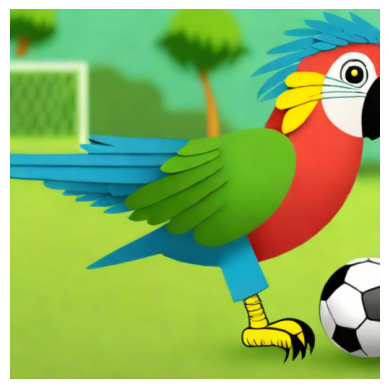

In [ ]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16
).to("cuda")

image = pipe("How would you visualize a parot playing soccer?").images[0]




# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()


